# 1 Importa liberias

Trata de importar todas tus librerías a la primera. Nada es más molesto que estar regresando múltiples veces hasta acá para importar liberías que te faltaron.

In [1]:
#install libraries
!pip install -U seaborn
!pip install -U pandas
!pip install -U numpy

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


### Coded by Pedro Flores (pedri0)

'deep as ocean'

In [2]:
#Data extraction/manipulation/processing
import pandas as pd
import numpy as np

#Data visualization
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os

# 2 Lee el dataset
1. read_csv
2. Determina bien tu path
    - un punto (.) quiere decir, busca en este folder
    - dos puntos (..) quieren decir, busca en el folder arriba de este
    - un guión (/) quiere decir, dentro de este folder
    - ejemplo --> ./Sets/compras.csv quiere decir, en la carpeta que estoy busca la carpeta Sets, entra a Sets, y recupera el archivo de nombre compras.csv
    
    
source: https://www.kaggle.com/mcdonalds/nutrition-facts

In [3]:
#read menu.csv located int current directory
menu = pd.read_csv('./menu.csv', sep=',')
#show first 7 rows in menu
menu.head(7)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15


# 3 Echa vistazos a tu dataset y limpia

**Vistazos**
1. info
2. nulls
3. head/tail
4. valores únicos por columna
5. .describe()  

**Limpia**  
1. Renombra columnas
2. Descarta columnas no interesantes
3. Corrige tipos de datos (strings, ints, etc)
4. Corrige nulos
5. Cada renglón es un sujeto? Cada columna es una característica?
6. Cada 'celda' es un sólo dato?
7. Hay renglones duplicados?

In [4]:
#get menu info
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

Del atributo .info() desplegado en la celda anterior observamos que el dataset consta de 260 filas con 24 columnas. Al observar la informacion especifica de cada una de las columnas se ve que **no existe ningun valor tipo nan**. Ademas existen 18 columnas de tipo entero, 3 de tipo float y 3 de tipo object, **debemos buscar en estas ultimas la posible existencia de valores de tipo string pero que simulen un NAN es decir 'NAN' o str(NAN)**

In [5]:
#display unique values per column
for column in menu.columns:
    print('-'*100)
    print('Unique values in column {}'.format(column))
    print(menu[column].nunique())

----------------------------------------------------------------------------------------------------
Unique values in column Category
9
----------------------------------------------------------------------------------------------------
Unique values in column Item
260
----------------------------------------------------------------------------------------------------
Unique values in column Serving Size
107
----------------------------------------------------------------------------------------------------
Unique values in column Calories
78
----------------------------------------------------------------------------------------------------
Unique values in column Calories from Fat
48
----------------------------------------------------------------------------------------------------
Unique values in column Total Fat
52
----------------------------------------------------------------------------------------------------
Unique values in column Total Fat (% Daily Value)
63
-------------

In [6]:
#show menu stats
menu.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


### Limpia

In [7]:
#modify column names to lower case
menu.columns = menu.columns.str.lower()
#replace spaces in column names for '_'
menu.columns = menu.columns.str.replace('\s+', '_', regex=True)
menu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       260 non-null    object 
 1   item                           260 non-null    object 
 2   serving_size                   260 non-null    object 
 3   calories                       260 non-null    int64  
 4   calories_from_fat              260 non-null    int64  
 5   total_fat                      260 non-null    float64
 6   total_fat_(%_daily_value)      260 non-null    int64  
 7   saturated_fat                  260 non-null    float64
 8   saturated_fat_(%_daily_value)  260 non-null    int64  
 9   trans_fat                      260 non-null    float64
 10  cholesterol                    260 non-null    int64  
 11  cholesterol_(%_daily_value)    260 non-null    int64  
 12  sodium                         260 non-null    int

In [8]:
#get object column names
object_categories = list(menu.dtypes[menu.dtypes == 'object'].index.values)

In [9]:
#search for possible 'nan' values
#this is a dummy approach it could be improved
#iterate over all object columns
for category_name in object_categories:
    #get len of current column. if one lowered row with no spaces is equal to nan then we count it as one in counter
    counter = len(menu[menu[category_name].str.lower().str.replace('\s+', '', regex=True) == 'nan'])
    #print info
    if counter != 0:
        print('There are almost 1 nan value in {} column'.format(category_name))
    else:
        print('There arent nan values in {} column'.format(category_name))

There arent nan values in category column
There arent nan values in item column
There arent nan values in serving_size column


De lo anterior sabemos que el dataset no contiene valores nan ni strings tipo 'nan'

In [10]:
#correct data types, for this case only correct object
for category_name in object_categories:
    menu[category_name] = menu[category_name].astype('string')
    if category_name != 'serving_size':
        menu[category_name] = menu[category_name].astype('category')
    
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   category                       260 non-null    category
 1   item                           260 non-null    category
 2   serving_size                   260 non-null    string  
 3   calories                       260 non-null    int64   
 4   calories_from_fat              260 non-null    int64   
 5   total_fat                      260 non-null    float64 
 6   total_fat_(%_daily_value)      260 non-null    int64   
 7   saturated_fat                  260 non-null    float64 
 8   saturated_fat_(%_daily_value)  260 non-null    int64   
 9   trans_fat                      260 non-null    float64 
 10  cholesterol                    260 non-null    int64   
 11  cholesterol_(%_daily_value)    260 non-null    int64   
 12  sodium                         260 n

5. y 6. Cada renglon puede considerarse como un sujeto unico que representa la columna item, pues su value counts no supera el valor 1, ademas intuitivamente este valor item corresponde a un plato disponible que tiene el restaurante, ademas la columna categoria los clasifica por desayuno, comida, postre, bebida entre otros. Lo mismo puede decirse con cada columna, pues es una caracteristica unica. No me queda claro de si cada celda es un solo dato

In [11]:
#search for duplicates (consider all columns)
menu[menu.duplicated()]

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)


In [12]:
#search for duplicates in item column
menu[menu.duplicated(subset=['item'])]

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)


No existen filas duplicadas en el dataset al considerar todas las columnas y solo la columna item. La consideracion de la columna item se realiza porque puede pasar que en la recoleccion de datos se haya cometido un error y se haya registrado incorrectamente el valor de item. El analisis de las otras columnas por separado es irrelevante, pues por construccion la columna category debe contener almenos un item repetido, ademas las columnas referentes a las caracteristicas alimenticias pueden ofrecer valores repetidos debido a que se usen ingredientes similares.

# 4. Analisis univariado - Exploratorio
1. Determina una variable de interés
2. Determina el tipo de variable (cuali, cuanti)
3. **Cuali**
    - Frecuencia absoluta
    - Frecuencia relativa
    - Frecuencia acumulada
    - Distribución (sesgos, clases raras, clases únicas)
    - Proporciones
    - 80/20 en clases
    - Clases similares
    - **Plots**
        - sns.countplot
        - sns.barplot
4. **Cuanti**
    - Tendencia (un valor típico)
    - Dispersión (rango de valores típicos)
    - Sesgo
    - Valores únicos
    - Bultos
    - Outliers    
    - **Plots**
        - sns.histplot
        - sns.boxplot

### Cuantitativo - Categoria

In [13]:
#for quanlitative we'll use category column. For quantitative we'll use calories
#absolute frec
menu['category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: category, dtype: int64

In [14]:
#relative frec
menu['category'].value_counts(normalize=True)

Coffee & Tea          0.365385
Breakfast             0.161538
Smoothies & Shakes    0.107692
Beverages             0.103846
Chicken & Fish        0.103846
Beef & Pork           0.057692
Snacks & Sides        0.050000
Desserts              0.026923
Salads                0.023077
Name: category, dtype: float64

In [15]:
#cumsum
menu['category'].value_counts(normalize=True).cumsum()

Coffee & Tea          0.365385
Breakfast             0.526923
Smoothies & Shakes    0.634615
Beverages             0.738462
Chicken & Fish        0.842308
Beef & Pork           0.900000
Snacks & Sides        0.950000
Desserts              0.976923
Salads                1.000000
Name: category, dtype: float64

De la suma cumulativa deducimos que el 85% de las incidencias son representadas por las categorias [Coffee & Tea, Breakfast, Smoothies & Shakes, Chicken & Fish y Beverages]. [Beef & Pork, Snacks & Sides, Desserts y Salads] representan el 15% restante. Interesante ver que el restaurante ofrece el 3% de su menu u opciones algo saludable.

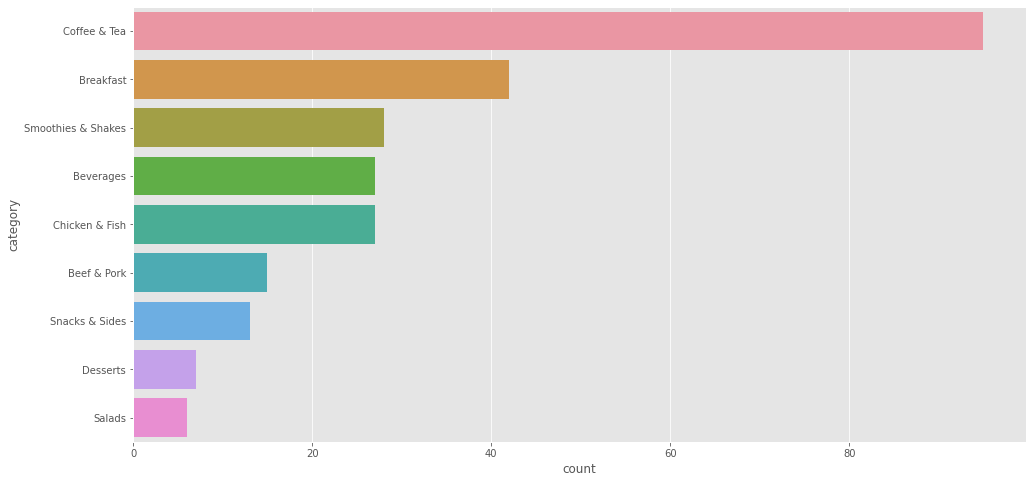

In [16]:
fig = plt.subplots(figsize=(16,8))
_ = sns.countplot(y = 'category', data=menu, order=menu['category'].value_counts().index)

Las clases similares (includas en el 80% de las incidencias) en cuanto a la proporcion son [Smoothies & Shakes, Chicken & Fish y Beverages]

### Cualitativo - Calorias

In [17]:
#valores tipicos
print('El promedio o media de calorias es {0:0.2f}'.format(menu['calories'].mean()))
print('La mediana de calorias es {0:0.2f}'.format(menu['calories'].median()))
print('La desviacion estandar de calorias es {0:0.2f}'.format(menu['calories'].std()))
IQR = menu['calories'].quantile(.75) - menu['calories'].quantile(.25)
print('El valor IQR de calorias es de {}'.format(IQR))

El promedio o media de calorias es 368.27
La mediana de calorias es 340.00
La desviacion estandar de calorias es 240.27
El valor IQR de calorias es de 290.0


In [18]:
#unique values
print('Los datos de calorias tienen {} valores unicos'.format(menu['calories'].nunique()))

Los datos de calorias tienen 78 valores unicos


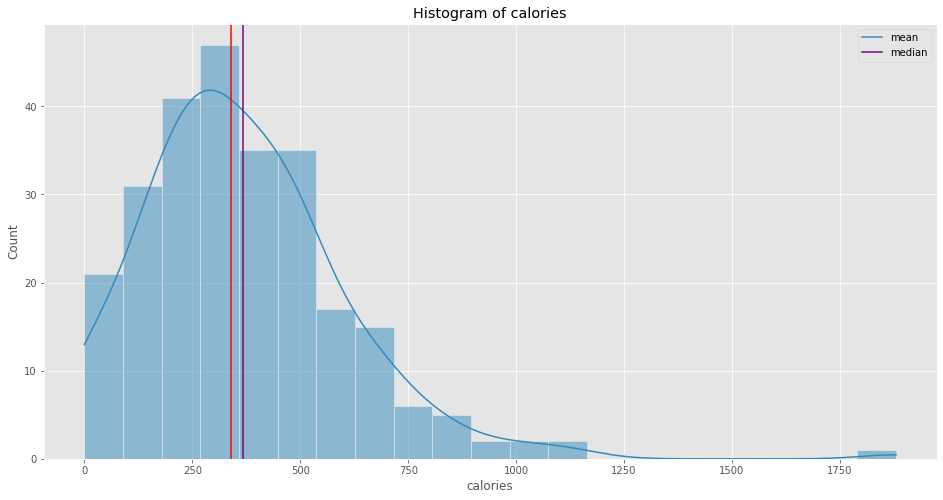

In [19]:
#histogram
fig = plt.subplots(figsize=(16,8))
_ = sns.histplot(x = 'calories', data=menu, kde=True)
_ = plt.axvline(menu['calories'].mean(), color='purple')
_ = plt.axvline(menu['calories'].median(), color = 'red')
_ = plt.legend(['mean', 'median'])
_ = plt.title('Histogram of calories')

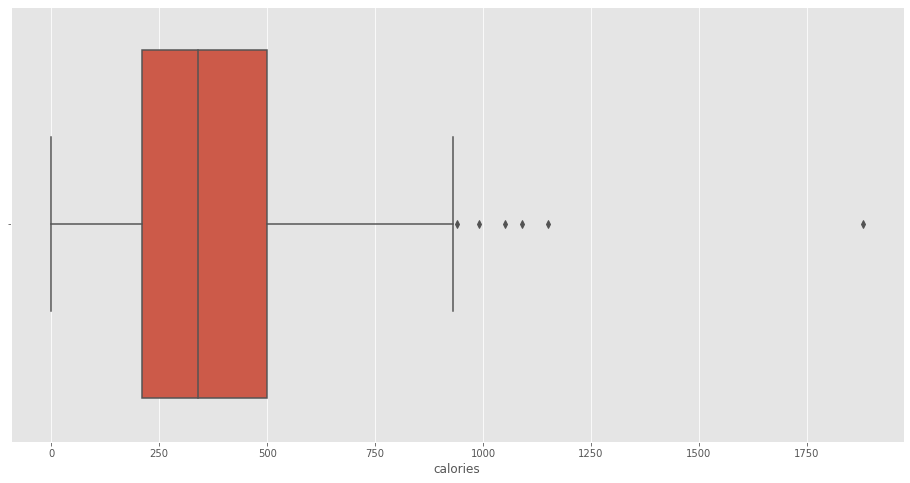

In [20]:
#box plot
fig = plt.subplots(figsize=(16,8))
_ = sns.boxplot(x = 'calories', data=menu)

Del histograma y boxplot vemos que existe un sesgo a la derecha de la distribucion de valores de calorias, existen pocos valores outliers (son 6). El bulto de los datos se encuentra a la izquierda. La mitad de los valores de calorias en el dataset valen 340.0 o menos, mientras que el 75% de los valores de calorias vale 500.0 o menos

# 5. Bivariado - Exploratorio
1. **Cuali-cuali**
    - Lo mismo que un cualitativo univariado, pero tomando en cuenta las combinaciones
    - **Plots**
        - sns.catplot(kind = xxx)
            - swarm
            - strip
            - heatmap
                - pd.crosstab
                - df.pivot_table
        - sns.countplot con un hue
2. **Cuali-cuanti**
    - Lo mismo que un cuantitativo univariado, pero tomando en cuenta las combinaciones
    - **Plots**
        - sns.catplot(kind = xxx)
            - swarm
            - strip
            - box
            - point
3. **Cuanti-cuanti**
    - Existe una tendencia?
        - A mayor **x**, qué le pasa a **y**?
    - Hay puntos sobrelapados?
    - Hay puntos que aparecen sobre bandas?
    - Dónde está la mayor concentración de puntos?
    - Cuáles son los límites en **x** y **y**?
    - Cómo se verían los histogramas de **x** y **y**
    - Hay outliers bivariados?
    - **Plots**
        - sns.relplot(kind = xxxx)
            - scatter
            - hex

### Cuali - Cuali

In [21]:
#let's transform calories into categorical data
#limits
limits_to_cut = [menu.calories.min()-1, 500, 750, menu.calories.max()]
labels = ['sano', 'ok', 'insano'] #hand defined
#new column with categorical data
menu['categorical_calories'] = pd.cut(x=menu.calories, bins=limits_to_cut, labels=labels)

In [22]:
#based on category of food count how many are sano, ok and insano
cuali_cuali = pd.crosstab(index = menu['categorical_calories'], columns = menu['category'])
#absolute frec
cuali_cuali

category,Beef & Pork,Beverages,Breakfast,Chicken & Fish,Coffee & Tea,Desserts,Salads,Smoothies & Shakes,Snacks & Sides
categorical_calories,,,,,,,,,
sano,8,27,24,14,87,7,6,12,12
ok,7,0,13,11,7,0,0,10,1
insano,0,0,5,2,1,0,0,6,0


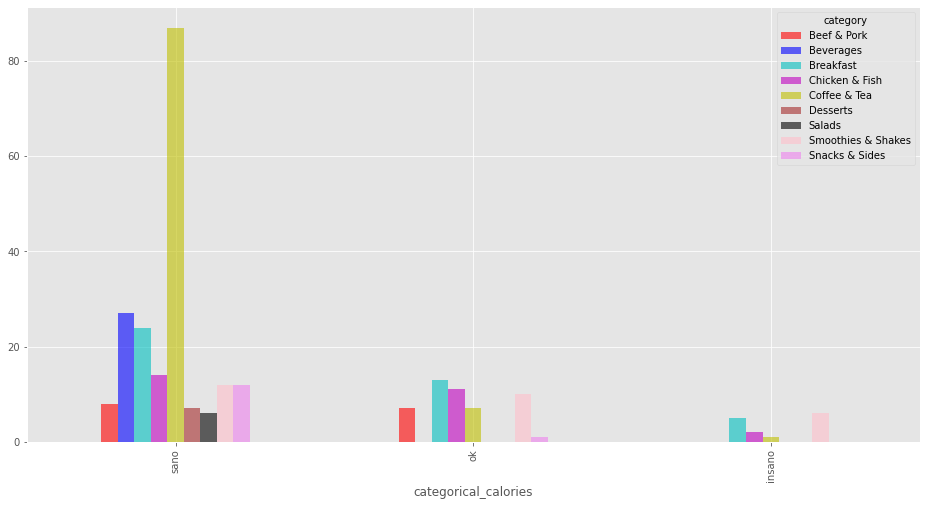

In [23]:
#plot of cuali_cuali absolute frec
fig, ax = plt.subplots(figsize = (16,8))
_ = cuali_cuali.plot.bar(ax = ax, color = ['r','b', 'c', 'm', 'y', 'brown', 'k', 'pink', 'violet'], alpha = .6)

In [24]:
#relative frec grouped by health level
menu.groupby('categorical_calories')['category'].value_counts(normalize=True)

categorical_calories                    
sano                  Coffee & Tea          0.441624
                      Beverages             0.137056
                      Breakfast             0.121827
                      Chicken & Fish        0.071066
                      Smoothies & Shakes    0.060914
                      Snacks & Sides        0.060914
                      Beef & Pork           0.040609
                      Desserts              0.035533
                      Salads                0.030457
ok                    Breakfast             0.265306
                      Chicken & Fish        0.224490
                      Smoothies & Shakes    0.204082
                      Beef & Pork           0.142857
                      Coffee & Tea          0.142857
                      Snacks & Sides        0.020408
                      Beverages             0.000000
                      Desserts              0.000000
                      Salads                0.000000
insan

In [25]:
#cumsum of relative frec grouped by health level
menu.groupby('categorical_calories')['category'].value_counts(normalize=True).cumsum()

categorical_calories                    
sano                  Coffee & Tea          0.441624
                      Beverages             0.578680
                      Breakfast             0.700508
                      Chicken & Fish        0.771574
                      Smoothies & Shakes    0.832487
                      Snacks & Sides        0.893401
                      Beef & Pork           0.934010
                      Desserts              0.969543
                      Salads                1.000000
ok                    Breakfast             1.265306
                      Chicken & Fish        1.489796
                      Smoothies & Shakes    1.693878
                      Beef & Pork           1.836735
                      Coffee & Tea          1.979592
                      Snacks & Sides        2.000000
                      Beverages             2.000000
                      Desserts              2.000000
                      Salads                2.000000
insan

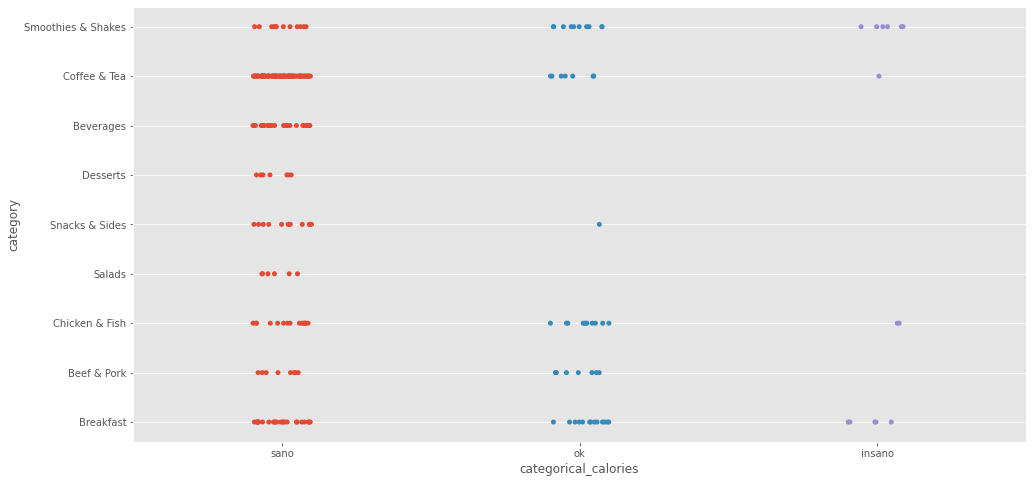

In [26]:
fig = plt.subplots(figsize=(16,8))
_ = sns.stripplot(y='category', x='categorical_calories', data=menu)

De la grafica de barras y el stripplot podemos observar la distribucion de las categorias en funcion de que tan sanas son. Vemos que coffe and tea son los productos mas sanos, seguido de las bebidas, mientras que hay mas productos insanos que corresponde a la categoria smoothies, algo que quiza es obvio. Por otro lado las categorias Salads y Desserts son siempre categorias sanas. Cabe mencionar que el etiquetado fue a mano y no necesariamente la escala sano, ok e insano sean correctas.
Podemos inferir la distribucion de clases 80-20 y la similitud al observar la suma cumulativa de la frecuencia relativa agrupada por la cuantizacion de las calorias.

### Cuali - Cuanti

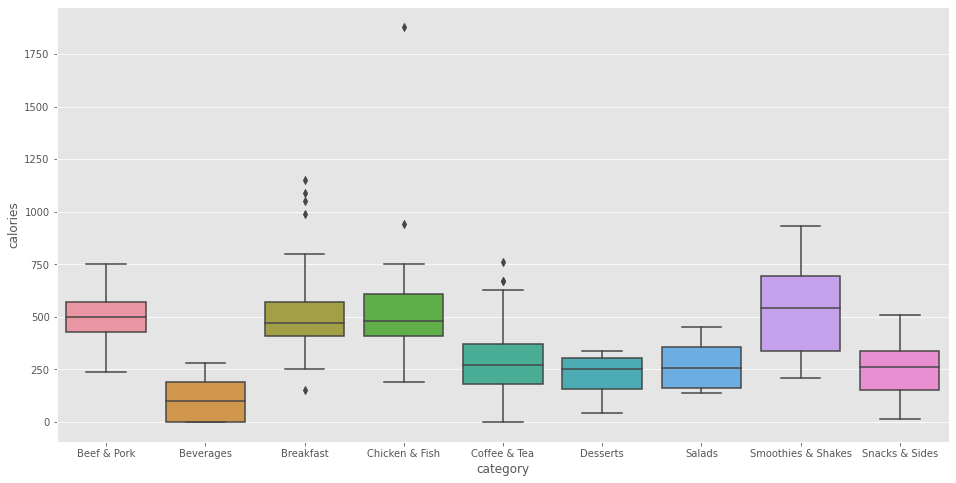

In [27]:
#boxplot
fig = plt.subplots(figsize=(16,8))
_ = sns.boxplot(x='category', y='calories', data=menu)

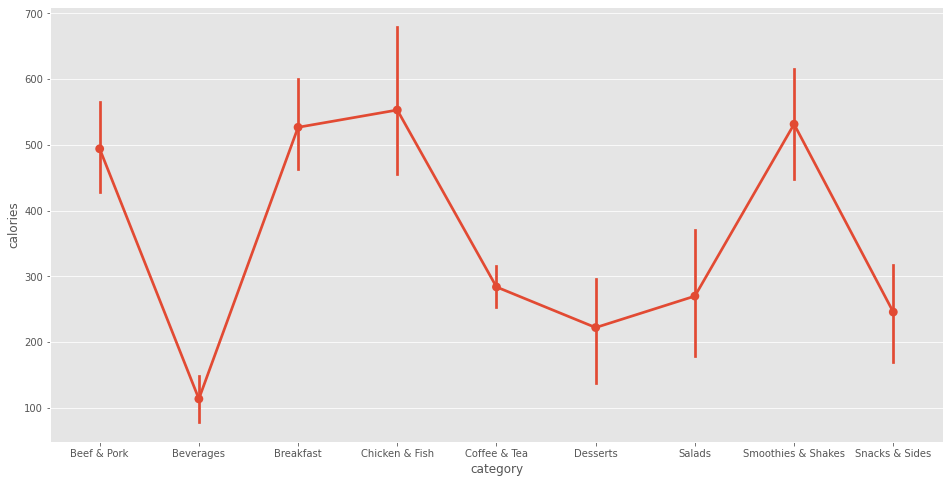

In [28]:
#point plot
fig = plt.subplots(figsize=(16,8))
_ = sns.pointplot(x='category', y='calories', data=menu)

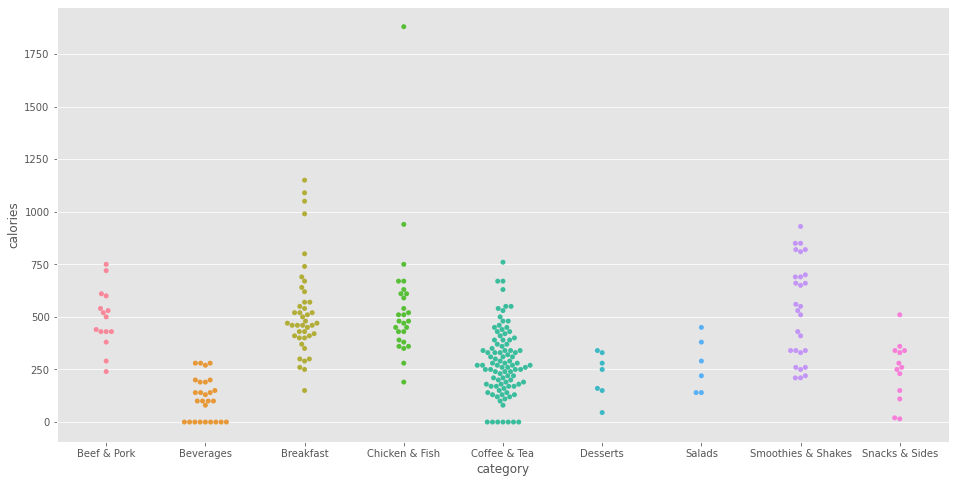

In [29]:
#swarmplot
fig = plt.subplots(figsize=(16,8))
_ = sns.swarmplot(x='category', y='calories', data=menu)

De los tres graficos anteriores es posible inferir la distribucion de calorias en cada category, en general de media los smoothies son los que contienen mayor cantidad de calorias, pero su rango es muy variante, en cambio beef and pork tiene el rango menos variado. Se observan pocos outliers. Ademas del point plot es posible inferir la correlacion estadistica entre variables.
No vale la penha mostrar todos los histogramas pues cada histograma se translapa y mostrarlo podria confundir al lector, dejo el codigo para mostrarlo:

### Cuanti - Cuanti

Calories vs cholesterol

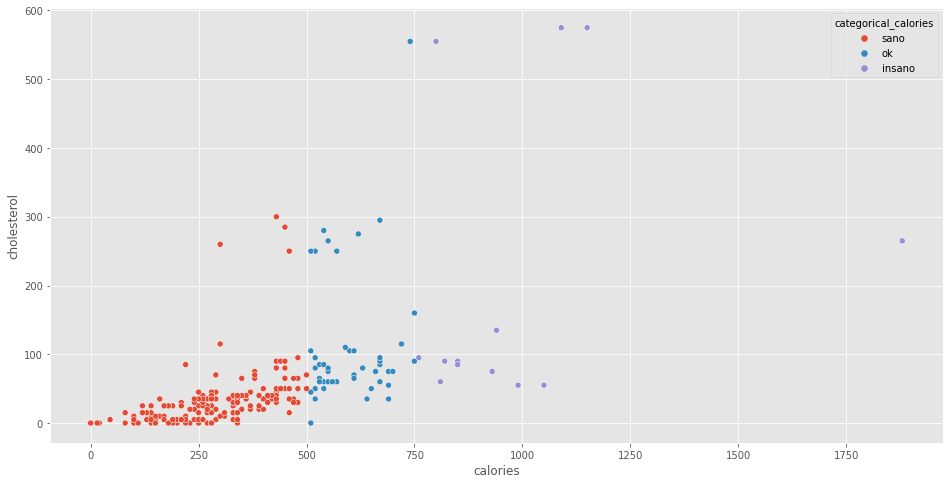

In [30]:
#lineplot
fig = plt.subplots(figsize=(16,8))
_ = sns.scatterplot(x='calories', y='cholesterol', data=menu, hue='categorical_calories')

Del scatter plot se observa una tendencia lineal ya que a mayores calorias mayor sera el aporte de colesterol. Existen puntos que se sobrelapan, la mayor concentracion de puntos se da en los intervalos [0, 700] para calorias, mientras que [0, 110] para el colesterol. El limite de valores para calorias es de [0, 1800] y para colesterol es de [0, 550] aproximadamente. Existen outliers los cuales se encuentran en el intervalo [250, 1250] y [200, 550] para calorias y colesterol respectivamente.

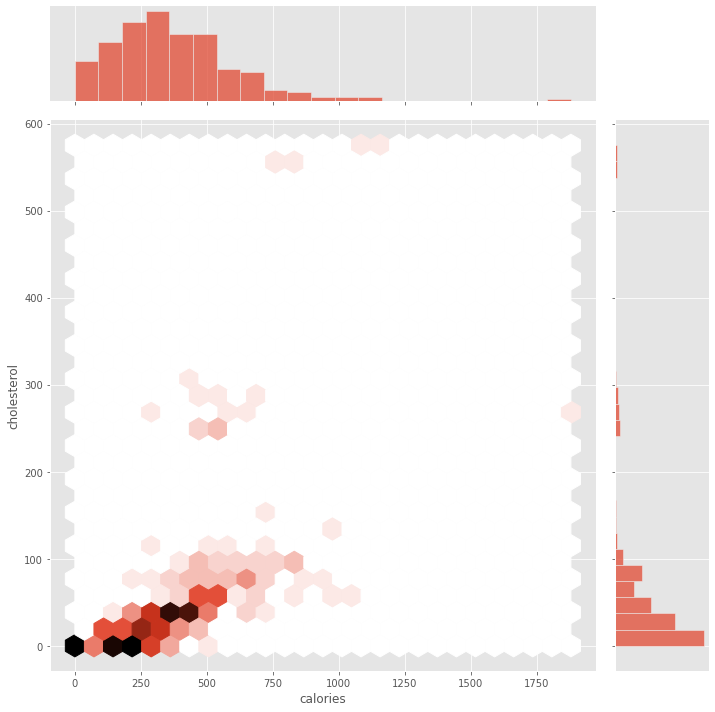

In [31]:
#bee plot
_ = sns.jointplot(x='calories', y='cholesterol', data=menu, kind='hex', height=10)

El hexplot confirma lo descrito en la celda anterior. Ademas, muestra los histogramas de cada variable vemos que ambos hiostogramas presentan un sesgo a la derecha. La concentracion de colesterol es mayor comparada con la de calorias.

# 6. Multivariado - Exploratorio
- Usando catplot/scatterplot son los mismos pero jugando con:
    - rows, cols
    - hue
- usa groupbys multinivel
- usa heatmaps con pivot_table o crosstab y una variable agregada
- usa grouped bar charts https://seaborn.pydata.org/examples/grouped_barplot.html

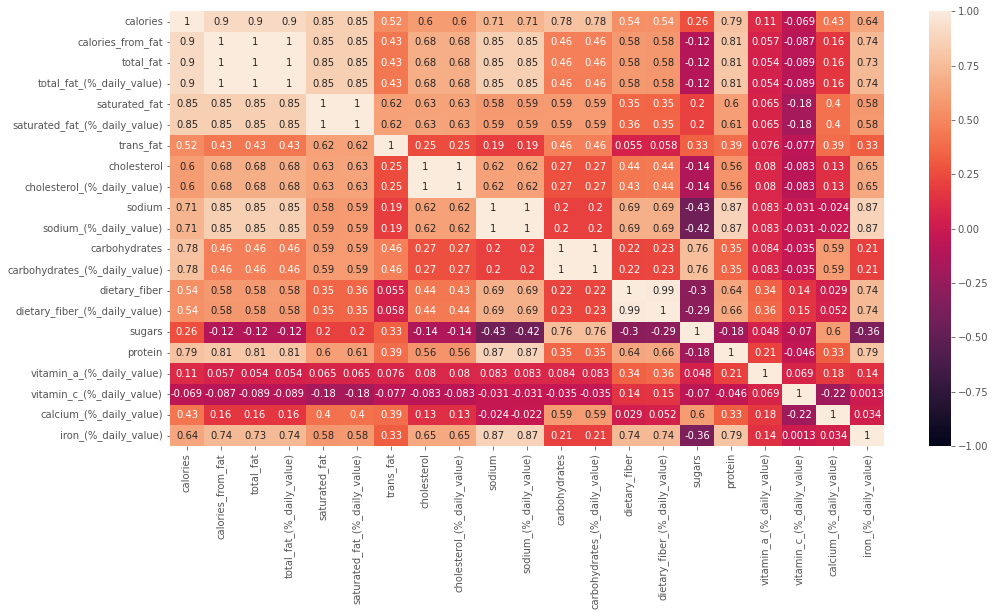

In [32]:
#correlation heatmap
fig = plt.subplots(figsize=(16,8))
_ = sns.heatmap(menu.corr(), annot=True, vmax=1, vmin=-1)

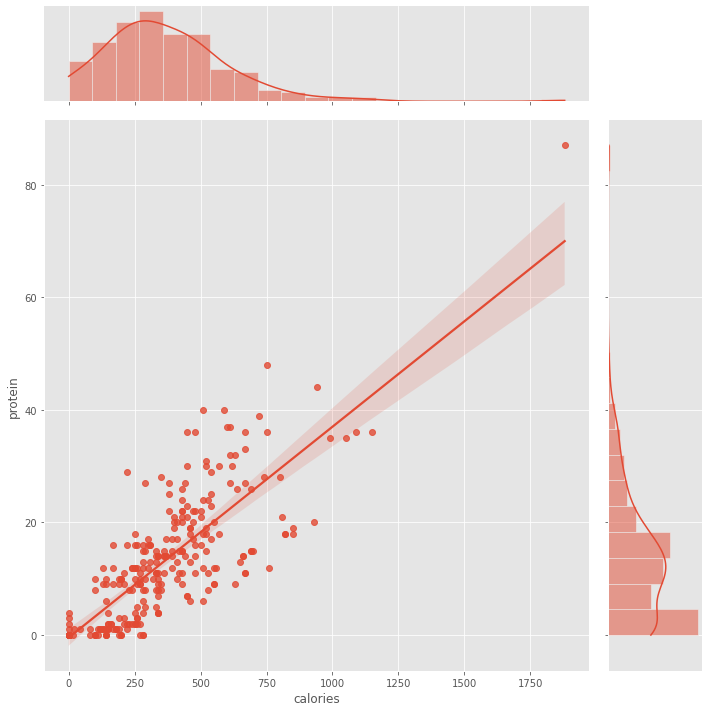

In [33]:
##lets take calories with protein
#scatter plot with linear reg
_ = sns.jointplot(x='calories', y='protein', data=menu, kind='reg', height=10)

Existe una correlacion lineal decente entre proteinas y calorias

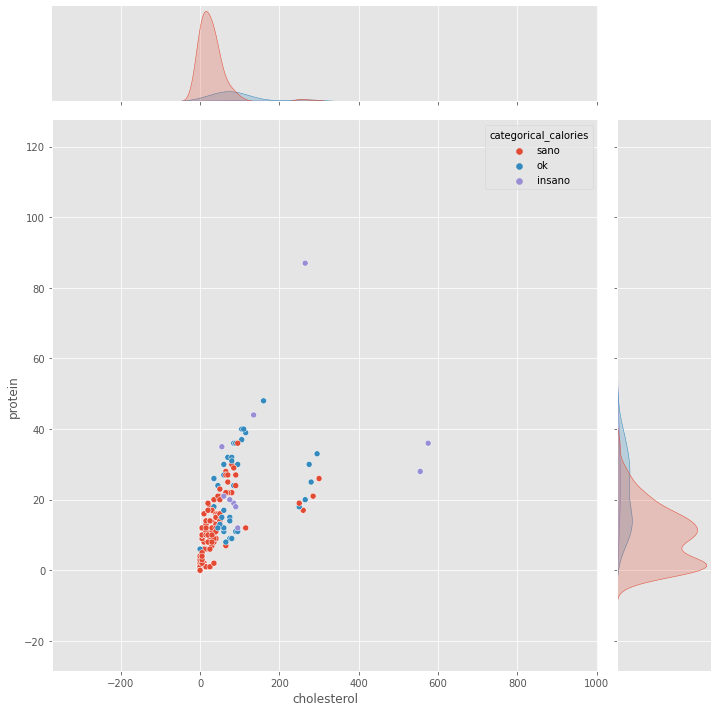

In [34]:
##lets take calories with protein
#scatter plot with linear reg
_ = sns.jointplot(x='cholesterol', y='protein', data=menu, kind='scatter', height=10, hue='categorical_calories')

In [35]:
#show median of grouped menu by category and categorical calories
grouped_menu = menu.groupby(['category','categorical_calories']).median().dropna()
grouped_menu

calories  calories_from_fat  \
category           categorical_calories                                
Beef & Pork        sano                     430.0              195.0   
                   ok                       600.0              260.0   
Beverages          sano                     100.0                0.0   
Breakfast          sano                     415.0              195.0   
                   ok                       570.0              290.0   
                   insano                  1050.0              470.0   
Chicken & Fish     sano                     410.0              160.0   
                   ok                       610.0              250.0   
                   insano                  1410.0              795.0   
Coffee & Tea       sano                     260.0               45.0   
                   ok                       550.0              200.0   
                   insano                   760.0              280.0   
Desserts           sano                     250.0               70.0   
Salads             sano                     255.0               80.0   
Smoothies & Shakes sano                     295.0               10.0   
                   ok                       655.0              170.0   
                   insano                   835.0              210.0   
Snacks & Sides     sano                     255.0               85.0   
                   ok                       510.0              220.0   

                                         total_fat  total_fat_(%_daily_value)  \
category           categorical_calories                                         
Beef & Pork        sano                       21.5                       33.0   
                   ok                         29.0                       45.0   
Beverages          sano                        0.0                        0.0   
Breakfast          sano                       21.5                       33.0   
                   ok                         32.0                       49.0   
                   insano                     52.0                       80.0   
Chicken & Fish     sano                       18.0                       27.0   
                   ok                         28.0                       43.0   
                   insano                     88.5                      136.5   
Coffee & Tea       sano                        5.0                        8.0   
                   ok                         23.0                       35.0   
                   insano                     31.0                       48.0   
Desserts           sano                        8.0                       12.0   
Salads             sano                        8.0                       13.0   
Smoothies & Shakes sano                        1.0                        1.5   
                   ok                         19.0                       29.0   
                   insano                     23.5                       36.0   
Snacks & Sides     sano                        9.5                       15.0   
                   ok                         24.0                       37.0   

                                         saturated_fat  \
category           categorical_calories                  
Beef & Pork        sano                           9.00   
                   ok                            13.00   
Beverages          sano                           0.00   
Breakfast          sano                           8.50   
                   ok                            14.00   
                   insano                        18.00   
Chicken & Fish     sano                           3.50   
                   ok                             8.00   
                   insano                        15.00   
Coffee & Tea       sano                           3.50   
                   ok                            15.00   
                   insano                        20.00   
Desserts      

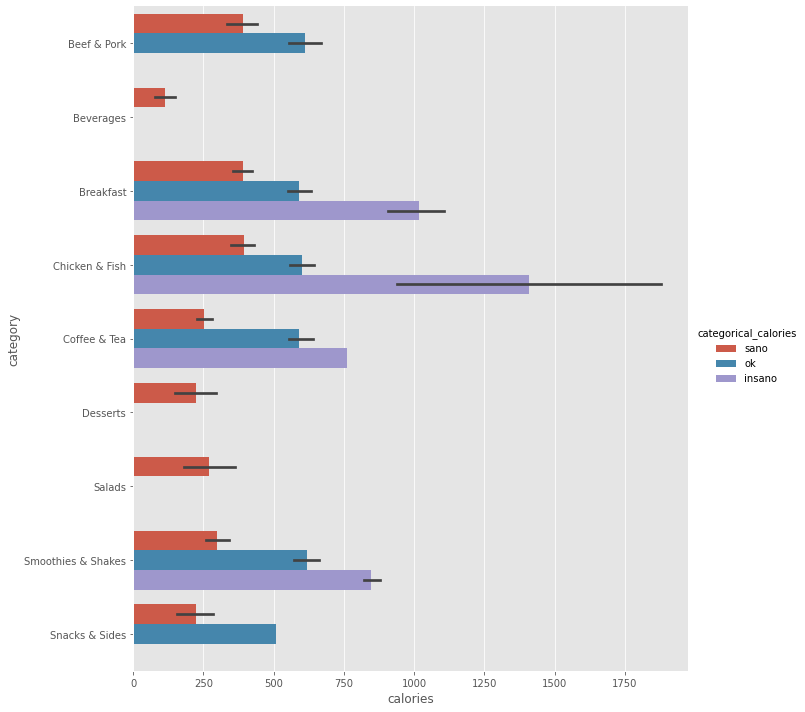

In [36]:
sns.catplot(data = menu, y='category', x='calories', kind='bar', hue='categorical_calories',orient='h',  height=10);

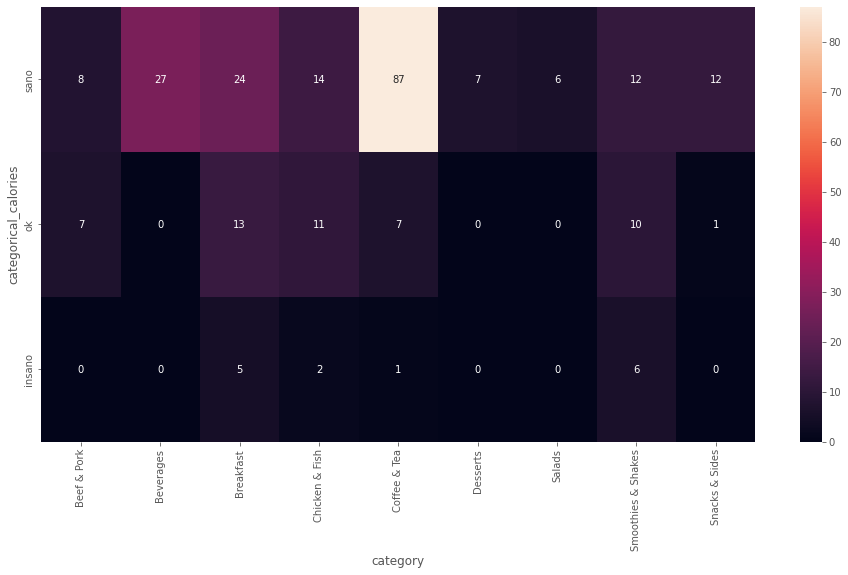

In [37]:
fig = plt.subplots(figsize=(16,8))
_ = sns.heatmap(cuali_cuali, annot=True)

In [38]:
#save to html
os.system('jupyter nbconvert --to html Analisis_exploratorio_datos_proyecto1.ipynb')

[NbConvertApp] Converting notebook Analisis_exploratorio_datos_proyecto1.ipynb to html
[NbConvertApp] Writing 1495739 bytes to Analisis_exploratorio_datos_proyecto1.html


0